# Noise Frequency Modulation
This tutorial covers how one can can create noise with frequency modulation extracted from the
experimental data distribution. The extraction process is described in the Methods section of the
paper, that can also be obtained from cryoSPARC noise variance plot. The noise variance extracted
from our example data is available, but please refer to the Methods section to extract the noise
frequency dependence from your own experimental data.

## Load Libraries

In [1]:
import sys
import numpy as np
from pathlib import Path
sys.path.append(str(Path.cwd()) + "/../src")

import EMCrafter
from EMCrafter.noise import NoiseModulator, NoiseShaper
EMCrafter.base._set_logging(minimal=True)

## Initialize variables and class: Flat frequency

NoiseModulator initialized


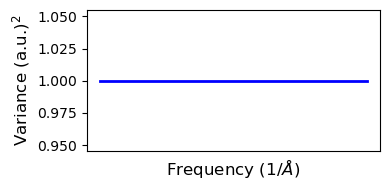

In [2]:
# Parameters
apix = 0.732        # Resoluiton in A/pixel
box_size = 480      # Box size

# Initializing NoiseModulator
nmod = NoiseModulator(verbose=2)  # Initialize class
nmod.set_apix(apix)               # Set Resolution

# Without any further setup, the class initializes with a flat frequency
fig = nmod.plot_modulator_1D()

## Set Experimental Frequency
One can use it using all unique radius bins, or separate into 1 pixel bins:

NoiseModulator initialized


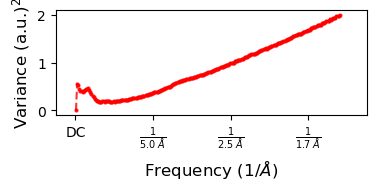

In [3]:
# Parameters
apix = 0.732        # Resolution in A/pixel
box_size = 480      # Box size

# Use your extracted values, for example:
bin_edges = np.arange(241)
variance = np.array([
    1.85109854e-11, 5.49327810e-01, 5.33607072e-01, 4.46608433e-01, 4.02845487e-01, 4.07916072e-01, 3.84993952e-01, 3.99338600e-01, 4.29750609e-01, 4.58086315e-01, 4.58416450e-01, 4.68133812e-01, 4.36292332e-01, 3.93303615e-01, 3.48156259e-01, 3.06628975e-01, 2.78124103e-01, 2.45923315e-01, 2.14480807e-01, 2.04078352e-01, 1.96529072e-01, 1.87011812e-01, 1.86020363e-01, 1.83388016e-01, 1.88396682e-01, 1.88283510e-01, 1.86968388e-01, 1.89549496e-01, 1.88713759e-01, 1.90054682e-01, 1.90478096e-01, 1.86667425e-01, 1.87882001e-01, 1.87736627e-01, 1.88670177e-01, 1.87783248e-01, 1.92582284e-01, 1.91948957e-01, 1.96029445e-01, 1.99518981e-01, 2.04101049e-01, 2.09757094e-01, 2.13491303e-01, 2.09162640e-01, 2.18393269e-01, 2.26930188e-01, 2.24949911e-01, 2.28549298e-01,
    2.31528903e-01, 2.33018001e-01, 2.42744473e-01, 2.54112604e-01, 2.51616160e-01, 2.57371411e-01, 2.61753560e-01, 2.64696942e-01, 2.73849639e-01, 2.79479626e-01, 2.83237910e-01, 2.91793143e-01, 2.96399591e-01, 3.02197370e-01, 3.10043503e-01, 3.19263130e-01, 3.22027899e-01, 3.32279243e-01, 3.37560014e-01, 3.49457028e-01, 3.51502289e-01, 3.59502876e-01, 3.72305494e-01, 3.79286493e-01, 3.80334745e-01, 3.89568101e-01, 3.95011880e-01, 4.08056488e-01, 4.10083520e-01, 4.24884458e-01, 4.32469751e-01, 4.45390360e-01, 4.53440224e-01, 4.64538039e-01, 4.77043792e-01, 4.90509836e-01, 4.88704892e-01, 5.00924450e-01, 5.14707081e-01, 5.34584845e-01, 5.44461158e-01, 5.58538887e-01, 5.66429902e-01, 5.79990573e-01, 5.89721534e-01, 5.95280018e-01, 6.11481582e-01, 6.19251570e-01,
    6.23479770e-01, 6.27924747e-01, 6.32839245e-01, 6.38952767e-01, 6.53299813e-01, 6.54335798e-01, 6.58638239e-01, 6.73627454e-01, 6.75165111e-01, 6.79493302e-01, 6.82119112e-01, 6.90715709e-01, 6.95990163e-01, 7.00400181e-01, 7.14658117e-01, 7.13745997e-01, 7.31219882e-01, 7.33093363e-01, 7.45222694e-01, 7.51496120e-01, 7.58779762e-01, 7.66493828e-01, 7.81387841e-01, 7.79630232e-01, 7.98244701e-01, 7.99672810e-01, 8.13695725e-01, 8.19605824e-01, 8.27157992e-01, 8.36170294e-01, 8.52776731e-01, 8.62251458e-01, 8.62681484e-01, 8.71645208e-01, 8.77978007e-01, 9.00689815e-01, 9.00440555e-01, 9.17013832e-01, 9.24970626e-01, 9.38952918e-01, 9.45240389e-01, 9.44177887e-01, 9.59439434e-01, 9.69037278e-01, 9.82988591e-01, 9.92838136e-01, 9.96136567e-01, 1.00116150e+00,
    1.02642124e+00, 1.02643739e+00, 1.03770091e+00, 1.06107800e+00, 1.04892657e+00, 1.05554139e+00, 1.07601802e+00, 1.08057722e+00, 1.09178767e+00, 1.11032855e+00, 1.11982086e+00, 1.11681683e+00, 1.13926743e+00, 1.15202061e+00, 1.15448350e+00, 1.17215920e+00, 1.17840241e+00, 1.18552369e+00, 1.18970056e+00, 1.20599167e+00, 1.20090743e+00, 1.22802884e+00, 1.23552945e+00, 1.23840591e+00, 1.25900208e+00, 1.26502954e+00, 1.27441531e+00, 1.28489010e+00, 1.30889601e+00, 1.29478227e+00, 1.31109289e+00, 1.32092141e+00, 1.32473132e+00, 1.34098684e+00, 1.34842346e+00, 1.36251157e+00, 1.37627925e+00, 1.37542769e+00, 1.38185964e+00, 1.40425306e+00, 1.40462484e+00, 1.42030539e+00, 1.42281518e+00, 1.43828709e+00, 1.45201242e+00, 1.46173188e+00, 1.46521497e+00, 1.48273273e+00,
    1.49969441e+00, 1.48821077e+00, 1.51588793e+00, 1.52085397e+00, 1.52785651e+00, 1.55231821e+00, 1.55575729e+00, 1.57416453e+00, 1.56874011e+00, 1.58927808e+00, 1.59618776e+00, 1.60517268e+00, 1.60588969e+00, 1.61859675e+00, 1.64206930e+00, 1.64790180e+00, 1.65897906e+00, 1.65094451e+00, 1.67950464e+00, 1.67989113e+00, 1.68800642e+00, 1.72068157e+00, 1.72695366e+00, 1.73648585e+00, 1.74024171e+00, 1.74376265e+00, 1.76616733e+00, 1.78056442e+00, 1.78935586e+00, 1.78856854e+00, 1.79257971e+00, 1.82188771e+00, 1.81775344e+00, 1.83369572e+00, 1.84138560e+00, 1.86039727e+00, 1.86245354e+00, 1.87741980e+00, 1.90156611e+00, 1.88913565e+00, 1.91037014e+00, 1.92701686e+00, 1.93167109e+00, 1.94018539e+00, 1.96562152e+00, 1.96895506e+00, 1.97904375e+00, 1.99950971e+00
])

# Initializing NoiseModulator
nmod = NoiseModulator(verbose=2)  # Initialize class
nmod.set_apix(apix)               # Set Resolution
nmod.set_modulation(              # Set modulation parameters
    bin_edges,                    # Edges of the histogram (pixel radius)
    variance,                     # Corresponding variance per bin
    box_size)                     # Image box size

# Visualize
fig = nmod.plot_modulator_1D()

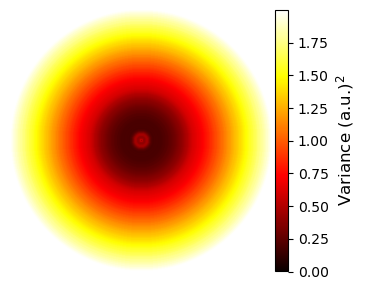

In [4]:
# The expanded version can also be visualized
fig = nmod.plot_modulator_2D()

## Set Experimental Binned frequency
Or use different bin widths, for example:

NoiseModulator initialized


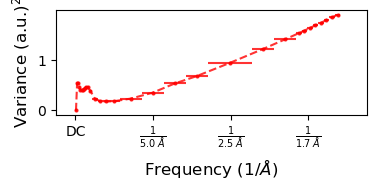

In [5]:
# Parameters
apix = 0.732        # Resolution in A/pixel
box_size = 480      # Box size

# Use your extracted values, for example:
bin_edges = np.array([
 0,   1,   2,   3,   4,   5,   6,   7,   8,
      9,  10,  12,  15,  20,  25,  30,  40,
     60,  80, 100, 120, 160, 180, 200, 205,
    210, 215, 220, 225, 230, 235, 240])
variance = np.array([
    2.11325322e-11, 5.40978151e-01, 5.40628613e-01, 4.58879223e-01, 4.14320672e-01, 4.09713557e-01, 4.07239538e-01, 4.24285155e-01,
    4.39586586e-01, 4.58531033e-01, 4.64357290e-01, 3.93507035e-01, 2.36888590e-01, 1.83334006e-01, 1.79167898e-01, 1.83943069e-01,
    2.35892694e-01, 3.54219475e-01, 5.37067798e-01, 6.84487136e-01, 9.46889104e-01, 1.22259777e+00, 1.41436848e+00, 1.53763435e+00,
    1.58937269e+00, 1.64073593e+00, 1.69385432e+00, 1.74332645e+00, 1.79907557e+00, 1.85219952e+00, 1.90266923e+00])

# Initializing NoiseModulator
nmod = NoiseModulator(verbose=2)  # Initialize class
nmod.set_apix(apix)               # Set Resolution
nmod.set_modulation(              # Set modulation parameters
    bin_edges,                    # Edges of the histogram (pixel radius)
    variance,                     # Corresponding variance per bin
    box_size)                     # Image box size

# Visualize
fig = nmod.plot_modulator_1D()

## Applying modulation to a random generated noise

NoiseShaper initialized
Setting shape to Gaussian
Loaded NoiseShaper object from data/pickle/noise_shape.pkl


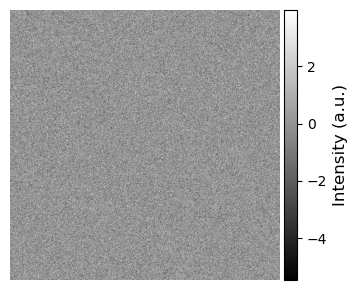

In [6]:
# We start loading our NoiseShaper from previous tutorial
nshap = NoiseShaper(verbose=2).load("data/pickle/noise_shape.pkl")
image_shape = (box_size, box_size)

# And generated a random noise:
noisy_image = nshap.sample(image_shape, 1)
_ = nshap.plot_image()

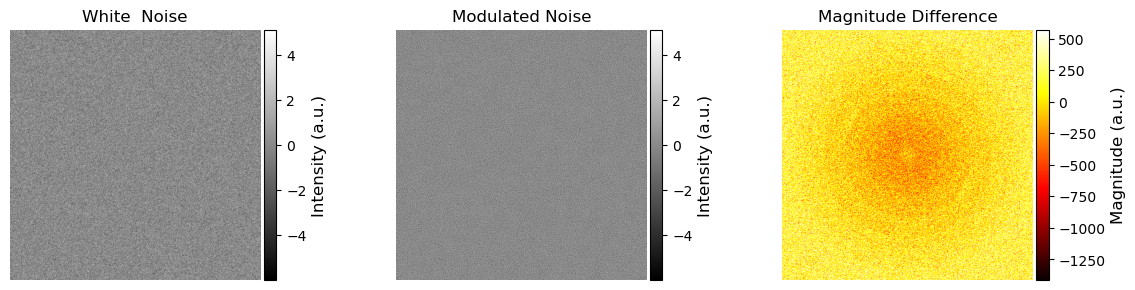

In [7]:
# To modulate this noise, we can use the modulate method from the NoiseModulator:
nmod.modulate(noisy_image)

# And visuallize the effects
_ = nmod.plot_modulated()

## Storing/Loading class

In [8]:
# Save noise modulator
nmod.save("data/pickle/noise_freq.pkl")

# Load noise modulator
nmod = NoiseModulator().load("data/pickle/noise_freq.pkl")

Saving NoiseModulator object  to  data/pickle/noise_freq.pkl
Loaded NoiseModulator object from data/pickle/noise_freq.pkl
